Filter trials by
1) Both walls are initially visible
2) Low wall first visible
3) High wall first visible
Plot p(H) for head angle at slice onset

**NOTES for myself**
- optimised some things compared to previous notebooks

- Both walls first visible is confusing, check functions. In some cases I plotted the head angle traj for it seems impossible that both are visible at slice onset

- One trial checked - bin assignment is correct, flip and rotation also correct (not the currently plotted example)

- How can LW seen first be true for head angle at slice onset most aligned with wall 1? Plotted example. Check functions again

In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
main_copy_dir = os.path.join(parent_dir, "main_copy")
octagon_analysis = os.path.join(parent_dir, "octagon_analysis")
sys.path.append(main_copy_dir)
sys.path.append(octagon_analysis)

print("Added paths to sys.path:", main_copy_dir, octagon_analysis)

Added paths to sys.path: c:\Users\tomha\repos\octagon_analysis\main_copy c:\Users\tomha\repos\octagon_analysis\octagon_analysis


In [89]:
#imports
%load_ext autoreload
%autoreload 2
import scipy
import parse_data.prepare_data as prepare_data
import numpy as np
import pandas as pd
from parse_data import preprocess
import matplotlib as mpl
import matplotlib.pyplot as plt
import globals
import plotting.plot_trajectory as plot_trajectory
import plotting.plot_octagon as plot_octagon
import data_extraction.extract_trial as extract_trial
import data_extraction.trial_list_filters as trial_list_filters
import math
import trajectory_analysis.trajectory_vectors as trajectory_vectors
import trajectory_analysis.trajectory_headangle as trajectory_headangle
from IPython.display import Image, display
import data_extraction.get_indices as get_indices
import prominent_direction_functions as prominent_direction_functions
import flip_rotate_headangle_functions
import headangle_analysis_plotting_functions
import headangle_bin_assignment_new
import analysis.wall_visibility_and_choice as wall_visibility_and_choice
import calculate_probabilities_functions
import plot_headangle_vectors_colour_map

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
data_folder = '/Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis'

json_filenames_all_social = [r'Json_data/2024-11-19_15-22-56_SophiaHocineSocial.json',
                                r'Json_data/2024-11-12_13-31-14_KhadijaWendySocial.json', 
                                r'Json_data/2024-12-19_15-28-24_JingjingYeungSocial.json', 
                                r'Json_data/2024-10-17_16-41-38_ZimoElsaSocial.json', 
                                r'Json_data/2025-01-15_15-21-27_YixuanMarcoSocial.json',
                                r'Json_data/2024-11-13_14-18-54_NasiaRyanSocial.json', 
                                r'Json_data/2024-11-19_14-24-49_AmyXinyuanSocial.json', 
                                r'Json_data/2024-09-27_14-25-20_SaraEmilySocial.json', 
                                r'Json_data/2024-11-13_15-28-07_YichuanHoiSocial.json', 
                                r'Json_data/2024-11-20_15-16-21_SunnyVinceSocial.json', 
                                r'Json_data/2025-01-15_16-50-13_YuChunSecondSocial.json', 
                                r'Json_data/2024-11-12_15-23-24_FrancescaSenSzeSocial.json', 
                                r'Json_data/2024-10-17_14-28-40_ShamirAbigailSocial.json',
                                r'Json_data/2024-09-13_11-31-00_YansuJerrySocial.json', 
                                r'Json_data/2024-11-20_14-17-44_JasonRahulSocial.json']
 
json_filenames_all_solo = [r'Json_data/2024-12-20_17-36-54_ChristopherFirstSolo.json',
                                r'Json_data/2025-01-15_15-12-39_MarcoFirstSolo.json',
                                r'Json_data/2024-12-19_15-51-33_YeungSecondSolo.json',
                                r'Json_data/2024-11-12_15-44-54_FrancescaSecondSolo.json',
                                r'Json_data/2024-11-12_15-11-45_SenFirstSolo.json',
                                r'Json_data/2024-11-20_15-39-49_VinceSecondSolo.json',
                                r'Json_data/2024-11-19_14-18-18_AmyFirstSolo.json',
                                r'Json_data/2024-11-12_15-45-35_SenSecondSolo.json',
                                r'Json_data/2024-11-12_13-50-23_KhadijaSecondSolo.json',
                                r'Json_data/2024-11-13_15-21-50_HoiFirstSolo.json',
                                r'Json_data/2024-09-13_11-23-37_YansuFirstSolo.json',
                                r'Json_data/2024-11-13_15-22-20_YichuanFirstSolo.json',
                                r'Json_data/2024-11-20_15-10-17_VinceFirstSolo.json',
                                r'Json_data/2025-01-15_16-14-40_YuChunFirstSolo.json',
                                r'Json_data/2024-11-12_13-18-59_WendyFirstSolo.json',
                                r'Json_data/2024-10-17_14-51-22_AbigailSecondSolo.json',
                                r'Json_data/2024-09-13_11-53-56_JerrySecondSolo.json',
                                r'Json_data/2024-09-27_14-14-42_EmilyFirstSolo.json',
                                r'Json_data/2025-01-15_16-50-13_YuChunSecondSolo.json',
                                r'Json_data/2024-11-12_13-50-20_WendySecondSolo.json',
                                r'Json_data/2025-01-15_15-46-04_MarcoSecondSolo.json',
                                r'Json_data/2024-10-17_14-20-50_AbigailFirstSolo.json',
                                r'Json_data/2024-11-13_15-51-39_YichuanSecondSolo.json',
                                r'Json_data/2024-11-20_14-41-56_RahulSecondSolo.json',
                                r'Json_data/2024-10-17_14-20-28_ShamirFirstSolo.json',
                                r'Json_data/2025-01-15_15-47-11_YixuanSecondSolo.json',
                                r'Json_data/2024-11-19_15-15-53_SophiaFirstSolo.json',
                                r'Json_data/2025-01-15_16-50-37_RuiqingSecondSolo.json',
                                r'Json_data/2024-11-20_15-40-08_SunnySecondSolo.json',
                                r'Json_data/2024-09-27_14-14-31_SaraFirstSolo.json',
                                r'Json_data/2024-09-27_14-45-46_EmilySecondSolo.json',
                                r'Json_data/2024-11-12_13-19-22_KhadijaFirstSolo.json',
                                r'Json_data/2024-11-12_15-13-34_FrancescaFirstSolo.json',
                                r'Json_data/2024-11-19_15-47-53_SophiaSecondSolo.json',
                                r'Json_data/2024-11-20_14-12-33_RahulFirstSolo.json',
                                r'Json_data/2024-10-17_14-50-03_ShamirSecondSolo.json',
                                r'Json_data/2024-09-13_11-53-34_YansuSecondSolo.json',
                                r'Json_data/2024-10-17_17-12-29_ElsaSecondSolo.json',
                                r'Json_data/2024-12-19_15-22-13_YeungFirstSolo.json',
                                r'Json_data/2024-12-19_15-51-58_JingjingSecondSolo.json',
                                r'Json_data/2024-11-13_15-51-16_HoiSecondSolo.json',
                                r'Json_data/2024-11-19_14-18-44_XinyuanFirstSolo.json',
                                r'Json_data/2024-12-20_18-06-44_ChristopherSecondSolo.json',
                                r'Json_data/2024-10-17_16-35-45_ElsaFirstSolo.json',
                                r'Json_data/2024-11-20_15-10-00_SunnyFirstSolo.json',
                                r'Json_data/2024-11-19_14-44-31_XinyuanSecondSolo.json',
                                r'Json_data/2024-11-20_14-12-06_JasonFirstSolo.json',
                                r'Json_data/2024-12-20_17-36-27_KirtanFirstSolo.json',
                                r'Json_data/2024-10-17_16-36-0_ZimoFirstSolo.json',
                                r'Json_data/2024-09-27_14-45-55_SaraSecondSolo.json',
                                r'Json_data/2024-10-17_17-11-46_ZimoSecondSolo.json',
                                r'Json_data/2024-12-20_18-06-10_KirtanSecondSolo.json',
                                r'Json_data/2025-01-15_16-14-58_RuiqingFirstSolo.json',
                                r'Json_data/2024-11-19_15-14-19_HocineFirstSolo.json',
                                r'Json_data/2024-11-20_14-42-16_JasonSecondSolo.json',
                                r'Json_data/2024-12-19_15-20-18_JingjingFirstSolo.json',
                                r'Json_data/2024-09-13_11-23-50_JerryFirstSolo.json',
                                r'Json_data/2025-01-15_15-12-13_YixuanFirstSolo.json',
                                r'Json_data/2024-11-19_15-47-29_HocineSecondSolo.json',
                                r'Json_data/2024-11-19_14-44-00_AmySecondSolo.json']

json_filename = r'Json_data/2024-11-12_13-50-23_KhadijaSecondSolo.json'


In [6]:
#prepare socials
df, trial_list = prepare_data.prepare_combined_session_data(data_folder, json_filenames_all_social)

filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-11-19_15-22-56_SophiaHocineSocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-11-12_13-31-14_KhadijaWendySocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-12-19_15-28-24_JingjingYeungSocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-10-17_16-41-38_ZimoElsaSocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2025-01-15_15-21-27_YixuanMarcoSocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-11-13_14-18-54_NasiaRyanSocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-11-19_14-24-49_AmyXin

In [8]:
#High-Low
trial_list_indices = get_indices.get_trials_trialtype(trial_list, trial_type=globals.HIGH_LOW)
trial_list_HL = [trial_list[i] for i in trial_list_indices]

#both walls visible first
both_walls_trials_player0, _ = trial_list_filters.filter_trials_both_walls_initially_visible(trial_list_HL, 0, 110)
both_walls_trials_player1, _ = trial_list_filters.filter_trials_both_walls_initially_visible(trial_list_HL, 1, 110)

#high wall visible first
HW_first_trials_player0 = trial_list_filters.filter_trials_one_wall_becomes_visible_first(trial_list_HL, 0, 110, 0)
HW_first_trials_player1 = trial_list_filters.filter_trials_one_wall_becomes_visible_first(trial_list_HL, 1, 110, 0)

#low wall visible first
LW_first_trials_player0 = trial_list_filters.filter_trials_one_wall_becomes_visible_first(trial_list_HL, 0, 110, 1)
LW_first_trials_player1 = trial_list_filters.filter_trials_one_wall_becomes_visible_first(trial_list_HL, 1, 110, 1)

filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 0. 1. ... 1. 0. 0.]
And the number of valid trials at this step is 533
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[1. 1. 1. ... 0. 0. 1.]
And the number of valid trials at this step is 565
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 1. 0. ... 0. 1. 0.]
And the number of valid trials at this step is 574
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 0. 0. ... 1. 1. 0.]
And the number of valid trials at this step is 519


In [9]:
#filter by wall separation
#for both walls for each player
#45°
p0_45_both_indices = get_indices.get_trials_with_wall_sep(both_walls_trials_player0, wall_sep=1)
p0_45_HL_both = [both_walls_trials_player0[i] for i in p0_45_both_indices]
print(len(p0_45_HL_both))

p1_45_both_indices = get_indices.get_trials_with_wall_sep(both_walls_trials_player1, wall_sep=1)
p1_45_HL_both = [both_walls_trials_player1[i] for i in p1_45_both_indices]

#90° 
p0_90_both_indices = get_indices.get_trials_with_wall_sep(both_walls_trials_player0, wall_sep=2)
p0_90_HL_both = [both_walls_trials_player0[i] for i in p0_90_both_indices]

p1_90_both_indices = get_indices.get_trials_with_wall_sep(both_walls_trials_player1, wall_sep=2)
p1_90_HL_both = [both_walls_trials_player1[i] for i in p1_90_both_indices]

#180°
p0_180_both_indices = get_indices.get_trials_with_wall_sep(both_walls_trials_player0, wall_sep=4)
p0_180_HL_both = [both_walls_trials_player0[i] for i in p0_180_both_indices]

p1_180_both_indices = get_indices.get_trials_with_wall_sep(both_walls_trials_player1, wall_sep=4)
p1_180_HL_both = [both_walls_trials_player1[i] for i in p1_180_both_indices]


212


In [24]:
trial_list = trial_list

trial_list_indices = get_indices.get_trials_trialtype(trial_list, trial_type=globals.HIGH_LOW)
trial_list_HL = [trial_list[i] for i in trial_list_indices]

fov = 110

players_HL_both_45_list, players_HL_both_90_list, players_HL_both_180_list = [], [], []
players_HL_HW_45_list, players_HL_HW_90_list, players_HL_HW_180_list = [], [], []
players_HL_LW_45_list, players_HL_LW_90_list, players_HL_LW_180_list = [], [], []

for player_id in range(2):
    both_walls_trials_player, _ = trial_list_filters.filter_trials_both_walls_initially_visible(trial_list_HL, player_id, fov)

    #for wall_index in range(2):
    first_wall_trials = [
        trial_list_filters.filter_trials_one_wall_becomes_visible_first(trial_list_HL, player_id, fov, wall_index)
        for wall_index in range(2)
    ]

    HW_first_trials_player = first_wall_trials[0][0] if first_wall_trials[0] else print("empty list")
    LW_first_trials_player = first_wall_trials[1][0] if first_wall_trials[1] else print("empty list")

    for wall_sep in [1,2,4]:
        both_HL_player_indices = get_indices.get_trials_with_wall_sep(both_walls_trials_player, wall_sep=wall_sep)
        players_HL_both = [both_walls_trials_player[i] for i in both_HL_player_indices]
        
            #if wall_index == 0:
                #HW_first_trials_player = first_wall_trials[0]
            #else: LW_first_trials_player = first_wall_trials[0]

        HW_HL_player_indices = get_indices.get_trials_with_wall_sep(HW_first_trials_player, wall_sep=wall_sep)
        players_HL_HW = [HW_first_trials_player[i] for i in HW_HL_player_indices]

        LW_HL_player_indices = get_indices.get_trials_with_wall_sep(LW_first_trials_player, wall_sep=wall_sep)
        players_HL_LW = [LW_first_trials_player[i] for i in LW_HL_player_indices]
        
        if wall_sep == 1:
            players_HL_both_45_list.extend(players_HL_both)
            players_HL_HW_45_list.extend(players_HL_HW)
            players_HL_LW_45_list.extend(players_HL_LW)
        elif wall_sep == 2:
            players_HL_both_90_list.extend(players_HL_both)
            players_HL_HW_90_list.extend(players_HL_HW)
            players_HL_LW_90_list.extend(players_HL_LW)
        else: 
            players_HL_both_180_list.extend(players_HL_both)
            players_HL_HW_180_list.extend(players_HL_HW)
            players_HL_LW_180_list.extend(players_HL_LW)


filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 0. 1. ... 1. 0. 0.]
And the number of valid trials at this step is 533
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 1. 0. ... 0. 1. 0.]
And the number of valid trials at this step is 574
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[1. 1. 1. ... 0. 0. 1.]
And the number of valid trials at this step is 565
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 0. 0. ... 1. 1. 0.]
And the number of valid trials at this step is 519


In [27]:
len(players_HL_HW_45_list[4])

541

In [11]:
#take whole trial list and update yaw & trajectory for both players
players_HL_lists = {
    "players_HL_both_45_list": players_HL_both_45_list,
    "players_HL_both_90_list": players_HL_both_90_list,
    "players_HL_both_180_list": players_HL_both_180_list,
    "players_HL_HW_45_list": players_HL_HW_45_list,
    "players_HL_HW_90_list": players_HL_HW_90_list,
    "players_HL_HW_180_list": players_HL_HW_180_list,
    "players_HL_LW_45_list": players_HL_LW_45_list,
    "players_HL_LW_90_list": players_HL_LW_90_list,
    "players_HL_LW_180_list": players_HL_LW_180_list,
}

updated_trial_lists = {}

trial_types = ["both", "HW", "LW"]
angles = [45, 90, 180]

for trial_type in trial_types:
    for angle in angles:
        key = f"updated_trial_list_{trial_type}_{angle}"
        list_name = f"players_HL_{trial_type}_{angle}_list"
        if list_name in players_HL_lists:
            updated_trial_lists[key] = flip_rotate_headangle_functions.process_and_update_trials_both_players(players_HL_lists[list_name])
        

In [ ]:
### FEW TESTS BELOW

In [43]:
first_wall_trials = [
    trial_list_filters.filter_trials_one_wall_becomes_visible_first(trial_list_HL, player_id, fov, wall_index)
    for wall_index in range(2)
]

filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[1. 1. 1. ... 0. 0. 1.]
And the number of valid trials at this step is 565
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 0. 0. ... 1. 1. 0.]
And the number of valid trials at this step is 519


In [28]:
trial_list_indices = get_indices.get_trials_trialtype(trial_list, trial_type=globals.HIGH_LOW)
trial_list_HL = [trial_list[i] for i in trial_list_indices]
test_list = trial_list_filters.filter_trials_one_wall_becomes_visible_first(trial_list_HL, 1, 110, 1)


filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 0. 0. ... 1. 1. 0.]
And the number of valid trials at this step is 519


In [31]:

test_indices = get_indices.get_trials_with_wall_sep(test_list[0], wall_sep=1)
test_list_again = [test_list[0][i] for i in test_indices]


In [32]:
len(test_list_again)

196

In [64]:
#trial = updated_trial_lists["updated_trial_list_HW_90"][1]
trial = players_HL_LW_45_list[4]
#trial = players_HL_HW_45_list[4]
#trial = test_list_again[4]
print(trial)

                    timeLocal        timeApplication eventDescription  data.playerPosition.0.clientId  data.playerPosition.0.location.x  data.playerPosition.0.location.y  data.playerPosition.0.location.z  data.playerPosition.0.rotation.x  data.playerPosition.0.rotation.y  data.playerPosition.0.rotation.z  data.playerPosition.1.clientId  data.playerPosition.1.location.x  data.playerPosition.1.location.y  data.playerPosition.1.location.z  data.playerPosition.1.rotation.x  data.playerPosition.1.rotation.y  data.playerPosition.1.rotation.z  data.trialNum data.trialType  data.wall1  data.wall2  data.wallTriggered  data.triggerClient  data.playerScores.0  data.playerScores.1         timeReferenced    trial_epoch
26363 1900-01-01 15:32:03.113 0 days 00:09:37.732000      trial start                             0.0                      -0.481139988                       1.984999657                      -5.423779011                     355.299804688                     154.401489258             

In [70]:
this_trial = extract_trial.extract_trial(trial, players_HL_LW_45_list, 4)

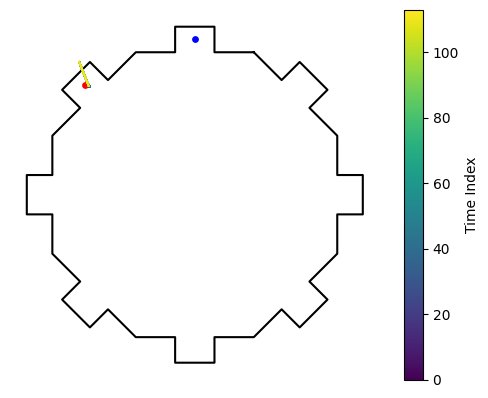

In [95]:
ax = plot_octagon.plot_octagon()
plot_headangle_vectors_colour_map.plot_trial_headangle_vectors_colour_map(ax, trial=trial, player_id=1, cmap=mpl.cm.viridis)
plt.show()

In [15]:
#assign head angle bins for slice onset
trial_types = ["both", "HW", "LW"]
angles = [45, 90, 180]

bin_assignments = {}

for trial_type in trial_types:
    for angle in angles:
        key = f"bin_assignments_{trial_type}_{angle}"
        trial_list_key = f"updated_trial_list_{trial_type}_{angle}"
        if trial_list_key in updated_trial_lists:
            bin_assignments[key] = headangle_bin_assignment_new.assign_bins_to_all_trials(updated_trial_lists[trial_list_key])


In [99]:
print((bin_assignments["bin_assignments_LW_45"][1]))

[4, 3, 8, 6, 1, 4, 6, 5, 1, 2, 3, 6, 1, 6, 1, 5, 2, 6, 8, 4, 1, 2, 2, 7, 2, 5, 6, 5, 1, 4, 1, 2, 8, 1, 3, 6, 1, 5, 6, 1, 6, 1, 2, 2, 8, 7, 8, 8, 4, 8, 5, 5, 5, 7, 1, 5, 8, 7, 5, 6, 7, 5, 8, 2, 7, 7, 3, 6, 4, 8, 7, 6, 6, 1, 2, 4, 4, 3, 5, 1, 2, 5, 7, 4, 3, 2, 4, 8, 6, 7, 7, 6, 2, 1, 8, 3, 3, 4, 1, 8, 2, 4, 2, 8, 1, 8, 1, 5, 4, 3, 6, 5, 8, 3, 1, 4, 5, 7, 7, 1, 1, 8, 5, 6, 2, 1, 1, 4, 5, 8, 8, 2, 2, 4, 8, 8, 5, 4, 4, 3, 5, 4, 1, 6, 3, 2, 7, 3, 7, 8, 5, 5, 3, 7, 4, 5, 7, 2, 4, 2, 1, 7, 8, 3, 1, 1, 1, 1, 1, 1, 3, 7, 3, 8, 8, 2, 4, 2, 1, 1, 3, 4, 8, 8, 4, 6, 4, 8, 5, 4, 5, 7, 5, 4, 4, 8, 8, 8, 7, 8, 1, 2, 8, 5, 7, 3, 5, 6, 4, 7, 7, 4, 4, 3, 3, 8, 4, 5, 2, 3, 8, 8, 6, 2, 5, 7, 2, 4, 5, 4, 4, 5, 4, 4, 4, 4, 7, 6, 7, 3, 7, 5, 5, 3, 4, 3, 3, 5, 3, 3, 6, 3, 6, 6, 6, 4, 6, 4, 4, 7, 6, 4, 3, 6, 5, 4, 5, 4, 5, 7, 7, 3, 7, 5, 7, 7, 5, 3, 6, 6, 5, 4, 3, 6, 4, 4, 3, 4, 3, 3, 7, 5, 3, 4, 6, 7, 5, 6, 5, 3, 3, 4, 4, 5, 3, 5, 3, 4, 6, 5, 4, 3, 6, 6, 5, 3, 4, 3, 5, 3, 6, 5, 7, 4, 6, 7, 5, 6, 4, 5, 4, 5, 4, 

In [22]:
trial_types = ['both', 'HW', 'LW']
angles = [45, 90, 180]

bins_by_player = {}

# Loop through each trial type and angle
for trial_type in trial_types:
    for angle in angles:
        bin_assignments_key = f"bin_assignments_{trial_type}_{angle}"

        if bin_assignments_key in bin_assignments:
            # Loop through each player's bin assignments for the current trial type and angle
            for player_id, player_bins in enumerate(bin_assignments[bin_assignments_key]):
                key = f"player_{player_id}_bins_{trial_type}_{angle}"
                bins_by_player[key] = player_bins


In [68]:
from collections import Counter

# Get the bin assignments for player 0 in "both_45"
player_0_bins = bins_by_player["player_1_bins_both_180"]

# Count occurrences of each value
bin_counts = Counter(player_0_bins)

# Print counts for each bin (1-8)
for i in range(1, 9):
    print(f"Count of {i}: {bin_counts.get(i, 0)}")

Count of 1: 2
Count of 2: 4
Count of 3: 7
Count of 4: 3
Count of 5: 3
Count of 6: 1
Count of 7: 5
Count of 8: 2


In [35]:
trial_types = ['both', 'HW', 'LW']
angles = [45, 90, 180]

choice_lists = {}
high_wall_chosen_lists = {}

# Loop through each trial type and angle
for trial_type in trial_types:
    for angle in angles:
        HL_lists_key = f"players_HL_{trial_type}_{angle}_list"
        if HL_lists_key in players_HL_lists:
            for player_id in range(2):
                key_choice = f"choice_{trial_type}_{angle}_player_{player_id}"
                key_high = f"high_wall_chosen_{trial_type}_{angle}_player_{player_id}"
                choice_lists[key_choice] = wall_visibility_and_choice.get_player_wall_choice(players_HL_lists[HL_lists_key], player_id, inferred_choice=True, debug=True)
                high_wall_chosen_lists[key_high] = get_indices.was_given_wall_chosen(players_HL_lists[HL_lists_key], choice_lists[key_choice], 0)


Time taken for player_wall_choice_win_or_loss (one session for one player) is 4.60
include loser's inferred choice status: True
player wall choices for this player: [ 6.  8.  6. nan  5.  6.  2.  2.  4.  2.  7.  4.  5.  7.  6.  1.  7. nan
  8.  6.  6.  3.  4.  5. nan  8.  5.  5.  7.  6.  1.  8.  1. nan  1.  8.
  3.  2.  3. nan  1.  6.  1.  4.  1.  7.  2.  2. nan nan  3. nan nan  5.
  2.  6.  6.  4. nan  5.  2.  8.  2.  6.  2.  8.  4.  6.  7.  4.  6.  4.
  8.  5.  6.  7.  1.  6.  5.  6.  7.  8.  8.  8.  8.  7.  6.  1.  6.  7.
  6. nan  6.  1.  3.  5.  6.  1.  5.  1.  7.  5.  7.  4.  2.  2.  7.  3.
  2.  5.  8.  1.  1. nan  5.  2.  7.  5.  3.  1. nan  5.  8.  8.  1.  2.
  3.  7.  3.  7.  1.  5.  4.  8.  7.  6.  4.  3. nan  4.  3.  4. nan nan
  2.  7.  2.  3.  6.  6.  7.  2.  8.  7.  3.  8.  7.  3.  3.  4.  2.  3.
  6.  1.  3.  5.  8.  5.  6.  1.  5. nan  2.  8.  6.  3.  3. nan  5.  3.
  2.  2.  1.  1. nan  2.  6.  6. nan  2.  3.  7.  4.  5.  7.  7.  4. nan
  6.  5.  3.  7.  3.  8.  6.  5.

In [49]:
probabilities_dict = {}
probabilities_list_dict = {}

for trial_type in trial_types:
    for angle in angles:
        bin_assignments_key = f"bin_assignments_{trial_type}_{angle}"

        if bin_assignments_key in bin_assignments:
            bin_assignments_lists = [bins_by_player[f"player_{player_id}_bins_{trial_type}_{angle}"] for player_id in range(2)]
            high_wall_chosen_lists_data = [high_wall_chosen_lists[f"high_wall_chosen_{trial_type}_{angle}_player_{player_id}"] for player_id in range(2)]

            key_prob = f"probabilities_list_{trial_type}_{angle}"
            key_dict = f"probabilities_{trial_type}_{angle}_dict"

            probabilities_dict[key_dict], probabilities_list_dict[key_prob] = calculate_probabilities_functions.calculate_high_wall_probabilities(
                bin_assignments_lists=bin_assignments_lists,
                high_wall_chosen_lists=high_wall_chosen_lists_data,
                debug=True
            )


[0.8984771573604061, 0.7743589743589744, 0.6309523809523809, 0.5, 0.5121951219512195, 0.5555555555555556, 0.6829268292682927, 0.7865168539325843]
Bin 1: 0.90 (True/Total = 177/197)
Bin 2: 0.77 (True/Total = 151/195)
Bin 3: 0.63 (True/Total = 53/84)
Bin 4: 0.50 (True/Total = 23/46)
Bin 5: 0.51 (True/Total = 21/41)
Bin 6: 0.56 (True/Total = 20/36)
Bin 7: 0.68 (True/Total = 28/41)
Bin 8: 0.79 (True/Total = 70/89)
[0.8, 0.7311827956989247, 0.4489795918367347, 0.19047619047619047, 0.4166666666666667, 0.23529411764705882, 0.5, 0.8421052631578947]
Bin 1: 0.80 (True/Total = 40/50)
Bin 2: 0.73 (True/Total = 68/93)
Bin 3: 0.45 (True/Total = 22/49)
Bin 4: 0.19 (True/Total = 4/21)
Bin 5: 0.42 (True/Total = 5/12)
Bin 6: 0.24 (True/Total = 4/17)
Bin 7: 0.50 (True/Total = 6/12)
Bin 8: 0.84 (True/Total = 16/19)
[1.0, 0.75, 0.6666666666666666, 0.2, 0.0, 0.0, 0.5, 0.75]
Bin 1: 1.00 (True/Total = 2/2)
Bin 2: 0.75 (True/Total = 6/8)
Bin 3: 0.67 (True/Total = 8/12)
Bin 4: 0.20 (True/Total = 1/5)
Bin 5: 0.0

In [55]:
overall_probabilities = {}

for trial_type in trial_types:
    for angle in angles:
        bin_assignments_key = f"bin_assignments_{trial_type}_{angle}"

        if bin_assignments_key in bin_assignments:
            bin_assignments_lists = [bins_by_player[f"player_{player_id}_bins_{trial_type}_{angle}"] for player_id in range(2)]
            high_wall_chosen_lists_data = [high_wall_chosen_lists[f"high_wall_chosen_{trial_type}_{angle}_player_{player_id}"] for player_id in range(2)]

            key_overall = f"overall_probability_{trial_type}_{angle}"

            overall_probabilities[key_overall] = calculate_probabilities_functions.calculate_p_high(
                bin_assignments_lists=bin_assignments_lists,
                high_wall_chosen_lists=high_wall_chosen_lists_data
            )


In [58]:
new_probabilities_list_dict = {}

for trial_type in trial_types:
    for angle in angles:
        key_prob = f"probabilities_list_{trial_type}_{angle}"
        key_overall = f"overall_probability_{trial_type}_{angle}"
        key_new_prob = f"new_probabilities_list_{trial_type}_{angle}"

        if key_prob in probabilities_list_dict and key_overall in overall_probabilities:
            new_probabilities_list_dict[key_new_prob] = [
                probability - overall_probabilities[key_overall] for probability in probabilities_list_dict[key_prob]
            ]

In [60]:
bin_ranges = headangle_bin_assignment_new.define_45_degree_bins()

Plotting both walls visible first
1)45
2)90
3)180
All High-Low


(2, 8)


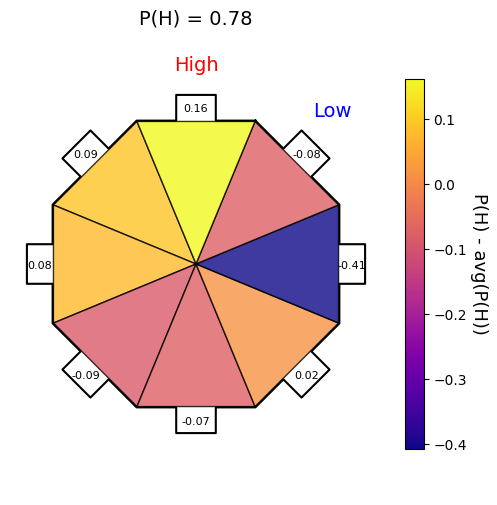

[0.16149711662280952, -0.07601675685110831, -0.40689910979228483, 0.015398187505012428, -0.07189910979228487, -0.08526989630913873, 0.0763098454315958, 0.09143422354104846]


In [92]:
#plot color gradient octagon for new ratios list

new_probabilities_list_HW_45=new_probabilities_list_dict["new_probabilities_list_HW_45"]
overall_probability_HW_45=overall_probabilities["overall_probability_HW_45"]

fig, ax = plt.subplots(figsize=(6, 6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin_ranges
bin_ranges = bin_ranges


#define ratios list
#probabilities_list_reversed = probabilities_list[::-1]

#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, new_probabilities_list_HW_45)

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, new_probabilities_list_HW_45)

#add wall labels
alcove_centers = plot_octagon.return_alcove_centre_points()

alcove_center1_x, alcove_center1_y = alcove_centers[:,0]
alcove_center2_x, alcove_center2_y = alcove_centers[:,1]

ax.text(alcove_center1_x, alcove_center1_y + 5, f'{"High"}', 
                ha='center', va='center', fontsize=14, color='Red')
ax.text(alcove_center2_x + 3, alcove_center2_y + 5, f'{"Low"}', 
                ha='center', va='center', fontsize=14, color='Blue')

#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmax=max(new_probabilities_list_HW_45), vmin=min(new_probabilities_list_HW_45)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label("P(H) - avg(P(H))", fontsize=13, rotation=270, labelpad=15)

rounded_HW_45 = round(overall_probability_HW_45, 2)
plt.title(f"P(H) = {rounded_HW_45}", fontsize=14)
plt.axis('equal')
plt.axis('off')
plt.show()
print(new_probabilities_list_HW_45)

(2, 8)
(2, 8)
(2, 8)
(2, 8)
(2, 8)
(2, 8)
(2, 8)
(2, 8)
(2, 8)


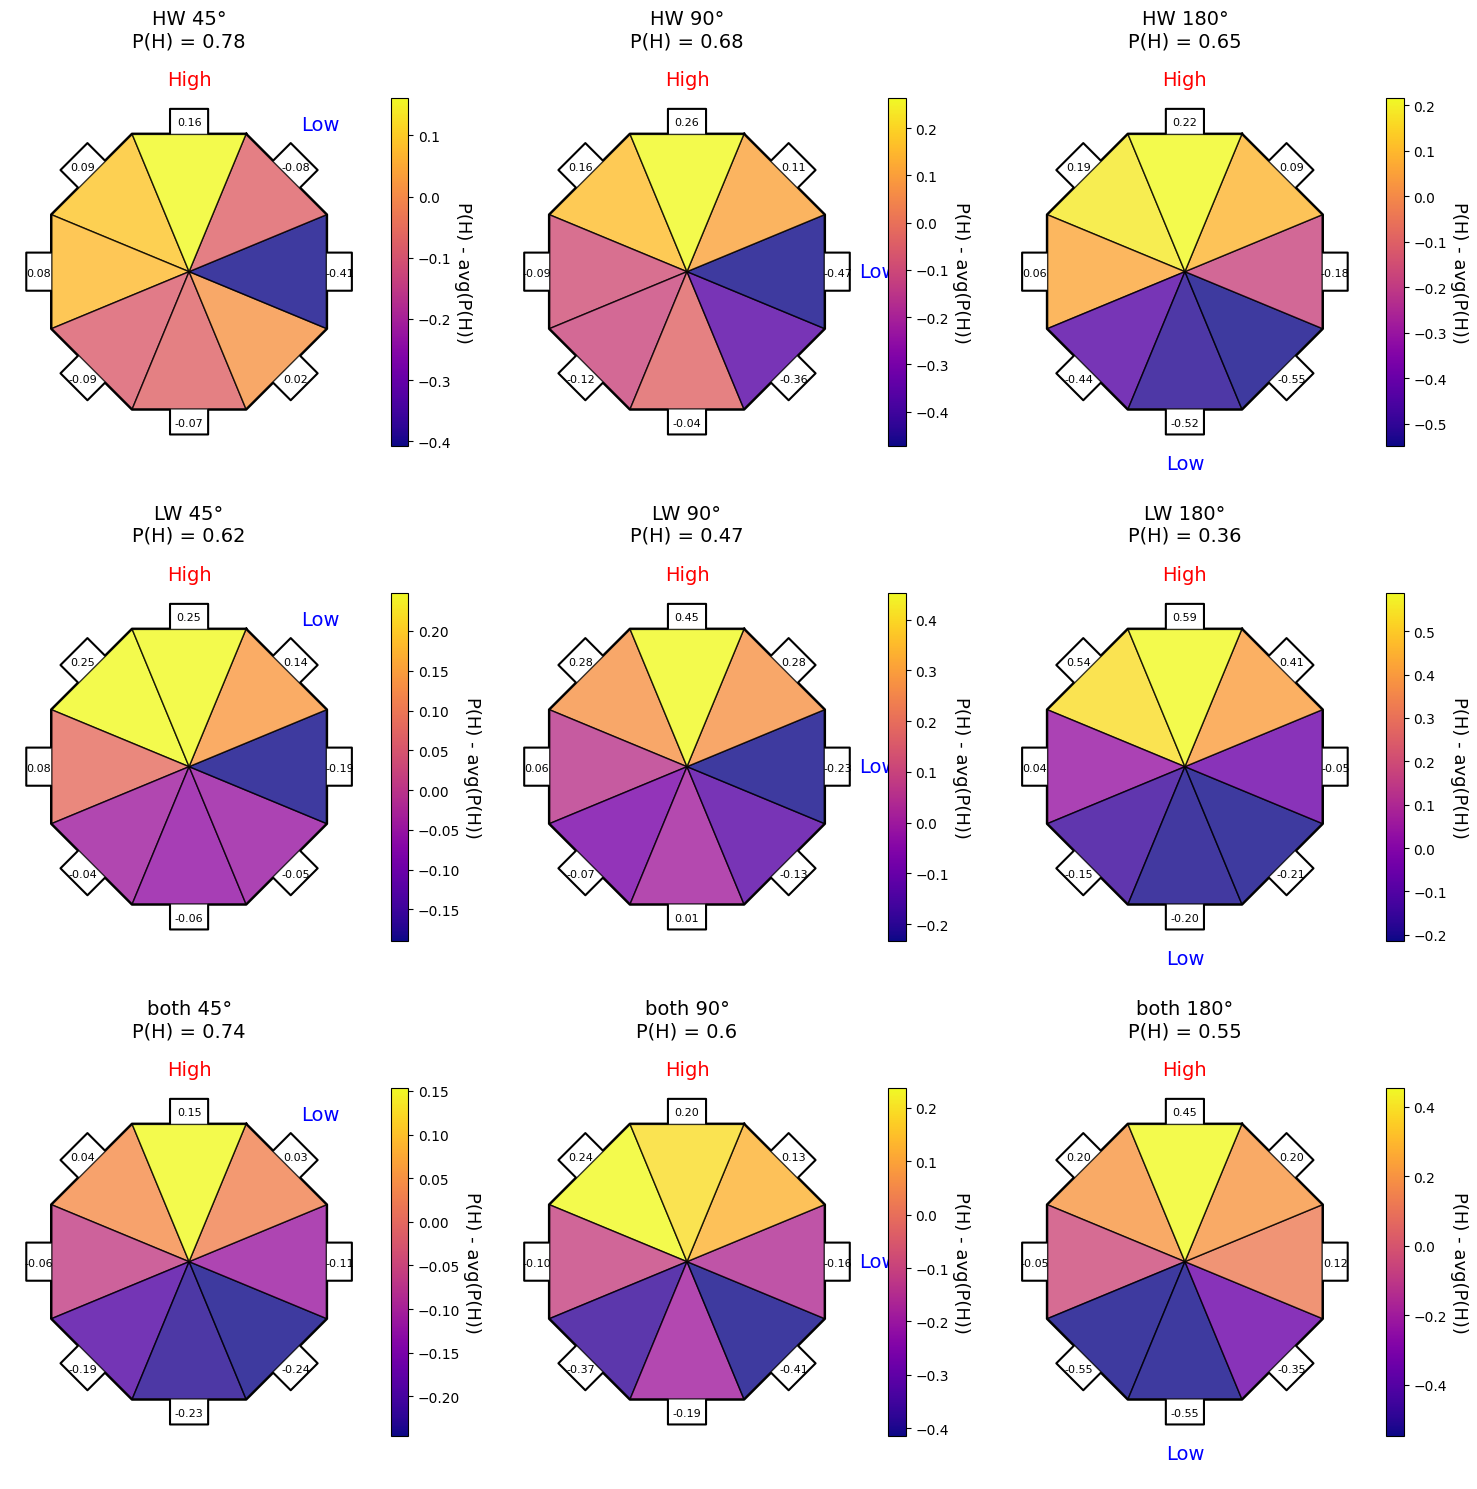

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Define trial types and angles
trial_types = ["HW", "LW", "both"]
angles = ["45", "90", "180"]

# Create a figure with subplots
fig, axes = plt.subplots(len(trial_types), len(angles), figsize=(15, 15))

# Loop through each trial type and angle combination
for i, trial_type in enumerate(trial_types):
    for j, angle in enumerate(angles):
        # Get the corresponding probabilities list and overall probability
        key = f"new_probabilities_list_{trial_type}_{angle}"
        overall_key = f"overall_probability_{trial_type}_{angle}"
        
        new_probabilities_list = new_probabilities_list_dict[key]
        overall_probability = overall_probabilities[overall_key]

        ax = axes[i, j]

        # Plot the octagon
        ax = plot_octagon.plot_octagon(ax=ax)

        # Color the segments of the octagon
        ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, new_probabilities_list)

        # Plot the ratios under the alcoves
        ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, new_probabilities_list)

        alcove_centers = plot_octagon.return_alcove_centre_points()
        alcove_center1_x, alcove_center1_y = alcove_centers[:, 0]
        alcove_center2_x, alcove_center2_y = alcove_centers[:, 1]
        alcove_center3_x, alcove_center3_y = alcove_centers[:, 2]
        alcove_center4_x, alcove_center4_y = alcove_centers[:, 4]

        if angle == "45":
            ax.text(alcove_center1_x, alcove_center1_y + 5, "High", ha="center", va="center", fontsize=14, color="Red")
            ax.text(alcove_center2_x + 3, alcove_center2_y + 5, "Low", ha="center", va="center", fontsize=14, color="Blue")

        elif angle == "90":
            ax.text(alcove_center1_x, alcove_center1_y + 5, "High", ha="center", va="center", fontsize=14, color="Red")
            ax.text(alcove_center3_x + 5, alcove_center3_y, "Low", ha="center", va="center", fontsize=14, color="Blue")

        elif angle == "180":
            ax.text(alcove_center1_x, alcove_center1_y + 5, "High", ha="center", va="center", fontsize=14, color="Red")
            ax.text(alcove_center4_x, alcove_center4_y - 5, "Low", ha="center", va="center", fontsize=14, color="Blue")

        # Add a colorbar
        sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmax=max(new_probabilities_list), vmin=min(new_probabilities_list)))
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
        cbar.set_label("P(H) - avg(P(H))", fontsize=13, rotation=270, labelpad=15)

        # Set title
        rounded_probability = round(overall_probability, 2)
        ax.set_title(f"{trial_type} {angle}°\nP(H) = {rounded_probability}", fontsize=14)

        # Remove axes
        ax.axis("equal")
        ax.axis("off")

# Adjust layout
plt.tight_layout()
plt.show()
